### Guided Project: Finding Heavy Traffic Indicators on I-94
The goal of our analysis is to find indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. We will use the dataset about westbound traffic on the I-94 Interstate highway.

#### The I-94 Traffic Dataset

In [ ]:
import urllib.request

# GitHub raw URL for the CSV file
traffic_url = 'https://raw.githubusercontent.com/Sat0ri1/MojeRep_PG/main/Metro_Interstate_Traffic_Volume.csv'

traffic_data = 'Metro_Interstate_Traffic_Volume.csv'

# Downloading the CSV file
urllib.request.urlretrieve(traffic_url, traffic_data)

('Metro_Interstate_Traffic_Volume.csv',
 <http.client.HTTPMessage at 0x7ec72626c400>)

In [ ]:
# importing pandas
import pandas as pd

# reading file with pandas
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [ ]:
#first 5 rows
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
#last 5 rows
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [ ]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


We can see that there are 9 columns, 3 floats, 2 ints and 4 objects. Dataset contains 48204 rows. Column names are in snakecase so we do not have to change them. There are no null objects which is good. Rows describe if there were holidays in this specific record, exact date with hour and weather conditions.

####  Analyzing Traffic Volume
First step in analysis will be examinination of the traffic_volume column distribution.

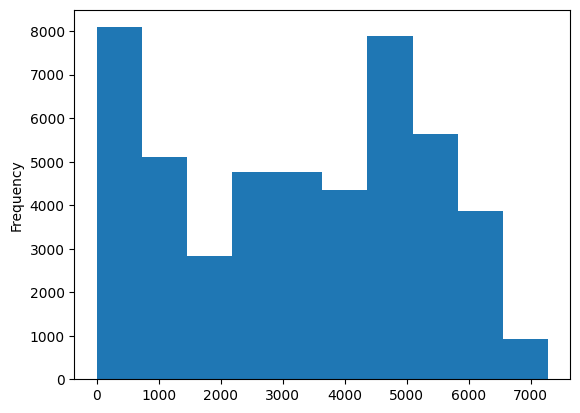

In [ ]:
# Importing matplotlib
import matplotlib.pyplot as plt

# Magic
%matplotlib inline

# Plotting a histogram
traffic['traffic_volume'].plot.hist()
plt.show()

In [ ]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

We can notice, that mean of traffic volume is approximately 3260. Minimum of traffic volume noted was 0 and maximum was 7280 cars. 25% of the time number of car was pretty low - 1193, 75% of time number of cars was lower than 4933, yet, it means that 25% of time it was higher than 4933, which means, that there is a big difference between the values in traffic volume. At the daytime, traffic volume should be higher than in the nighttime, this is also what may cause those big differences.

#### Traffic Volume: Day vs. Night

For further analysis we should split the data between daytime and nighttime. That's what we are going to do in this step

In [ ]:
# Transforming date_time column to datetime
traffic["date_time"] = pd.to_datetime(traffic["date_time"])

# Our day will be from 7:00 to 19:00 and night from 19:00 to 7:00
daytime = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(daytime.shape)

nighttime = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(nighttime.shape)

(23877, 9)
(24327, 9)


#### Traffic Volume: Day vs. Night (II)

We separated daytime from nighttime data, now we are going to compare them to see if there are differences.

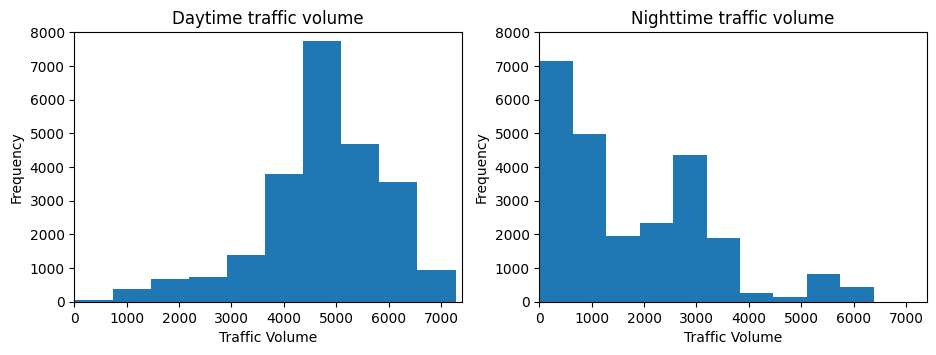

In [ ]:
plt.figure(figsize=(11,3.5))

# DAY
plt.subplot(1, 2, 1)
plt.hist(daytime['traffic_volume'])
plt.xlim(0, 7400)
plt.ylim(0, 8000)
plt.title('Daytime traffic volume')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

# NIGHT
plt.subplot(1, 2, 2)
plt.hist(nighttime['traffic_volume'])
plt.xlim(0, 7400)
plt.ylim(0, 8000)
plt.title('Nighttime traffic volume')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [ ]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [ ]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

There seems to be a big difference in traffic volume between daytime and nighttime. As supposed, traffic volume is on avarage lower at night. That doesn't mean, that there are no events with a big traffics at night. Max at night was 6386 cars in a single record, which is not so far from the record of the daytime - 7280. Most of the records show that during the daytime only 25% of times traffic volume is lower than 4252, which means that in the daytime it traffic volume is almost constantly high. It is very well visible on the plots how rare high traffic volume is at night at how often it occurs in the daytime. For the daytime, histogram is left skewed and for the nighttime it is rightskewed.

We should move forward with the analysis without using nighttime, because we want to find indicators of heavy traffics and those nearly do not occur at night.

#### Time Indicators
One of the reasons for heavy traffic can be time. We will check if a specific day, month, etc. can indicate a hard traffics.

In [ ]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-74-7d784f045492>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_month = daytime.groupby('month').mean()


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

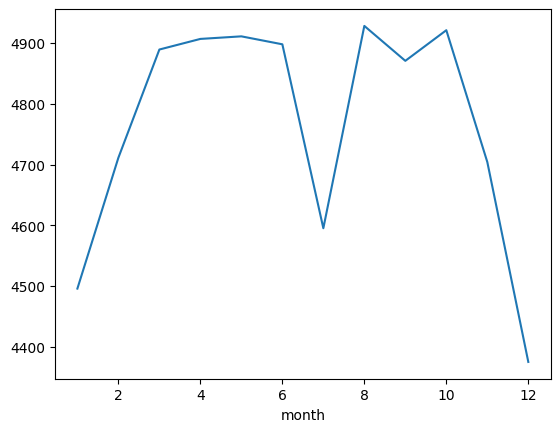

In [ ]:
by_month['traffic_volume'].plot.line()
plt.show()

It seems like in general, traffic volume is lower in the cold months and it get higher when it gets warmer. There is one exception and it is July. It should be time when people go on vacation, so it seems strange. Maybe there was a year in which the road was closed during july. We might check it, by plotting specificly for july.

<ipython-input-77-8b353e53f7a9>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  july.groupby('year').mean()['traffic_volume'].plot.line()


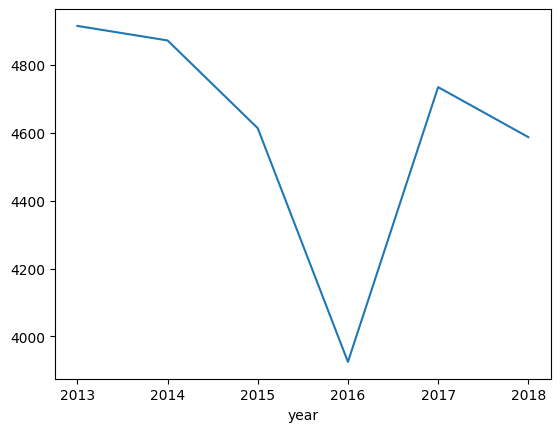

In [ ]:
daytime['year'] = daytime['date_time'].dt.year
july = daytime[daytime['month'] == 7]
july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

In general the traffic on this road is high during July, there was one year in which traffic got very low. Maybe there was a renovation in July 2016, or some other reason for closing the road. Yet, it supports the hypothesis that traffic volume is higher in warm months.

#### Time Indicators (II)

In this step we will create plots for day of the week as we did for month of the year in previous plot. My guess would be higher traffic volume during weekends, however if the road is in the middle of the city it should be opposite.

<ipython-input-78-4656e506b0fe>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weekday = daytime.groupby('weekday').mean()


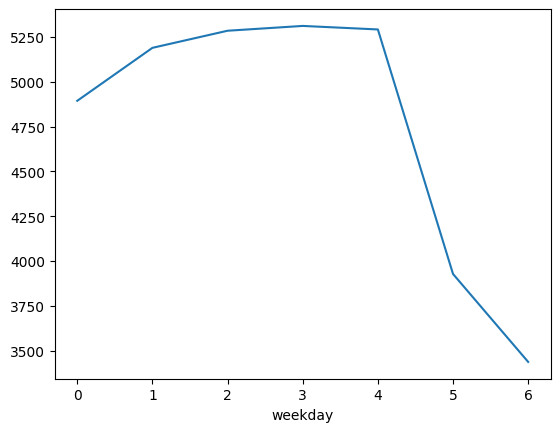

In [ ]:
daytime['weekday'] = daytime['date_time'].dt.weekday
by_weekday = daytime.groupby('weekday').mean()
by_weekday['traffic_volume'].plot.line()
plt.show()

It looks like during the weekends the traffic volume gets lower, with the lowest volume on sunday. It looks like many people is using the road in the working days and on sunday traffics are the lightest because most of people have a day off. For some unknown reason, mondey has the lightest traffics among all business days.

#### Time Indicators (III)

Last, but not least, we will create the plot for the time of the day to see at which ours heavy traffics are most likely to occur.

<ipython-input-79-a22c193408b9>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_business = bussiness_days.groupby('hour').mean()
<ipython-input-79-a22c193408b9>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_weekend = weekend.groupby('hour').mean()


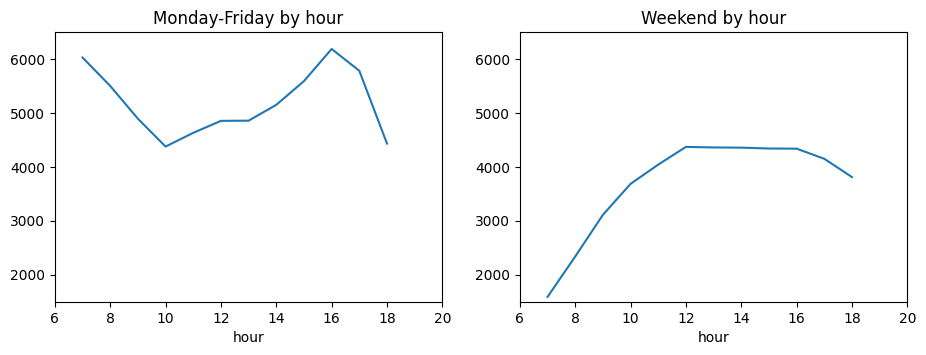

In [ ]:
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['weekday'] <= 4]
weekend = daytime.copy()[daytime['weekday'] >= 5]
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()


plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Monday-Friday by hour')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Weekend by hour')

plt.show()

In the working days(first plot) the traffic is heaviest before at 7:00 and it gets lower every hour to get the lowest at 10 AM. It looks just about right, people are driving to work, most of them start working at 8 AM so they have to be at work at this exact hour, less people drive to work later and traffic gets lighter. it peaks again at 16:00, when people are on their way home and it quickly descends to get way lower at  6PM.

At weekends traffic is growing since 7 AM to achieve a peak at 12 AM, it start decreasing at 4 AM. It seems reasonable, it's a free day, people can have a longer sleep and don't have to rush, activity from 11:00 to 17:00 don't differ too much.

It looks like all of 3 time indicators have a solid impact on traffics. Heavy traffics are most likely to happen in warm months, at business days and in a specific hours, when people go to, or come back from work.

#### Weather Indicators
It is also possible that weather can also indicate heavy traffics. Let's find out if it does and in what weather people are most likely to use the road.

In [ ]:
# Checking if there is a correlation between traffic volume and weather
daytime.corr()['traffic_volume']

<ipython-input-80-bcff67a75838>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  daytime.corr()['traffic_volume']


temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
weekday          -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

temperatures have the strongest correlation with traffics and it still is pretty low - 0.128317. Other collumns correlation is really low, therefore we will only take a look at temperatures. It's worth mentioning that month does not show as high correlation as temperatures, because month itself probably have a lower impact that temperature and is coincidence that we've seen correlation between month and traffic, because some months are warmer than others and temperature play role here, not the month itself.

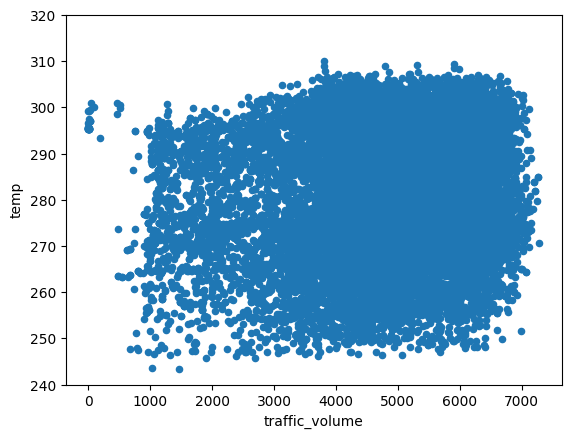

In [ ]:
daytime.plot.scatter('traffic_volume', 'temp')
plt.ylim(240, 320)
plt.show()

Scatterplot is hard to read here, we can see on the lower level of traffic volume, that there are less dots in lower temperatures. Also there were more extremal traffics around 7000 at higher temperatures.This correlation is not high at it is visible on plot and at statistics itself. I wouldn't say it is a reliable, but it might have some impact. Other weather indicators are not worth checking.

#### Weather Types

there are 2 collumns left to check: weather_main and weather_description
Let's see if those might be a reliable indicators of heavy traffics.

<ipython-input-82-b2bd3c7c3705>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_main = daytime.groupby('weather_main').mean()


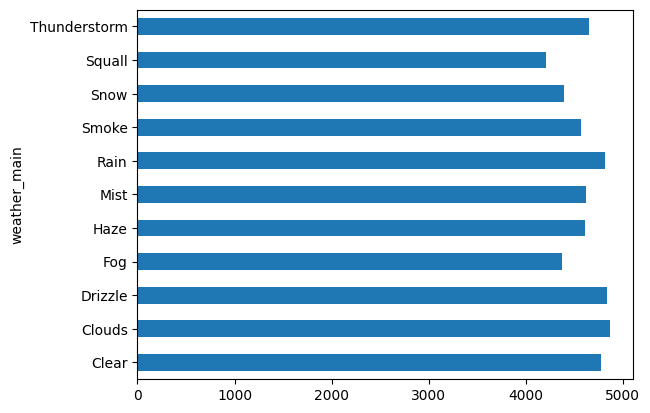

In [ ]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

It does not seem like any type of weather in weather_main have an impact on traffics. Squal, fog, mist, snow and squall are bad weather conditions to drive, so it seems reliable that the traffic is lower in those cases, alzo lighter rain makes more people drive instead of walk, therefore it is not suprising result. Differences are low tho and can't be a reliable indicator for heavy traffics.

<ipython-input-83-3701238869b3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_description = daytime.groupby('weather_description').mean()


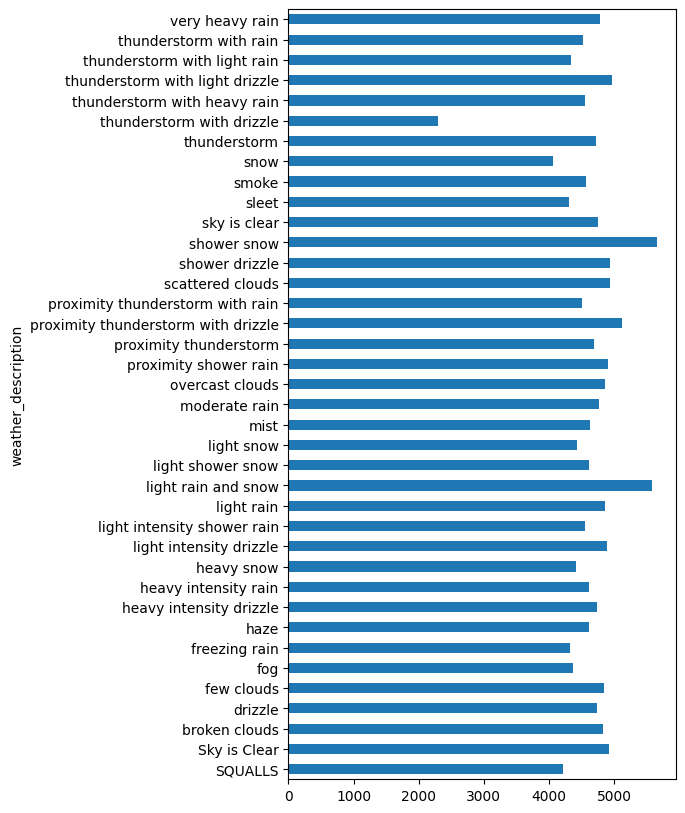

In [ ]:
by_weather_description = daytime.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

There it seems like some weather conditions might have an impact on traffics. Light rain and shower snow seems to indicate higher traffic and it makes sense as I said above. Thunderstorm with drizzle and squeels seems to decrease the traffics. All of the weather conditions make sense if it comes to differences in indicating traffic, yet most of them are low.

Summing up, the biggest impact factors in traffics seems to be:

* Daytime and day of the week together (hours indicating heavy traffics differ between weekends and business days).

* Temperature might but does not have to be an indicator, if it does, higher temperatures indicate heavier traffics.

* Weather conditions have low impact, but in general weather that makes terrible driving conditions indicate lower traffics (squalls, thunderstorms have the biggest impact of those) and weather that is not enjoyable to walk indicates higher traffics (light rain and snow, shower snows are the most impactful of those).

In general daytime and day of the week are definately the most reliable indicators of heavy traffics.